<a href="https://colab.research.google.com/github/subhra01/Python_Project_DS/blob/main/House_Price_Prediction_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***#We import our libraries and dataset and then we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.***


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [4]:
data = pd.read_csv("/content/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,5016001619,20150122T000000,699999.0,3,0.75,1240,4000,1.0,0,0,...,7,1240,0,1968,0,98112,47.6239,-122.297,1460.0,4000.0
19199,826069184,20141002T000000,535000.0,3,2.50,1960,47044,2.0,0,0,...,8,1960,0,1978,0,98077,47.7573,-122.070,2020.0,29004.0
19200,123039147,20150319T000000,464950.0,3,2.00,2190,19800,1.0,0,0,...,7,2190,0,1994,0,98146,47.5106,-122.365,1640.0,9719.0
19201,8089510150,20141202T000000,925000.0,4,2.50,3540,18168,2.0,0,0,...,10,3540,0,1996,0,98006,47.5441,-122.131,4130.0,11180.0


**Reading Dataset**

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


**Knowing more about the dataset**

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.920300e+04,1.920300e+04,19203.000000,19203.000000,19203.000000,1.920300e+04,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19202.000000,19202.000000,19202.000000,19202.000000
mean,4.566807e+09,5.342833e+05,3.361662,2.060668,2051.221684,1.577507e+04,1.432432,0.008072,0.244285,3.449773,7.592355,1748.449305,302.772379,1967.165755,91.770036,98073.052388,47.560466,-122.215543,1971.651703,13280.945787
std,2.863186e+09,3.663799e+05,0.934231,0.760180,902.702334,4.221429e+04,0.509854,0.089481,0.782352,0.667763,1.170519,805.655730,449.299744,27.992557,418.030706,709.124592,0.139509,0.138895,671.788080,27301.523343
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98.000000,47.155900,-122.519000,399.000000,660.000000
25%,2.123700e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.440000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1949.000000,0.000000,98033.000000,47.466700,-122.327000,1490.000000,5413.000000
50%,3.905100e+09,4.490000e+05,3.000000,2.000000,1899.000000,7.900000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573400,-122.232000,1830.000000,7809.500000
75%,7.292200e+09,6.380000e+05,4.000000,2.500000,2500.000000,1.110000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679200,-122.127000,2330.000000,10303.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


**Which is the most common house (Bedroom wise) ?**

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

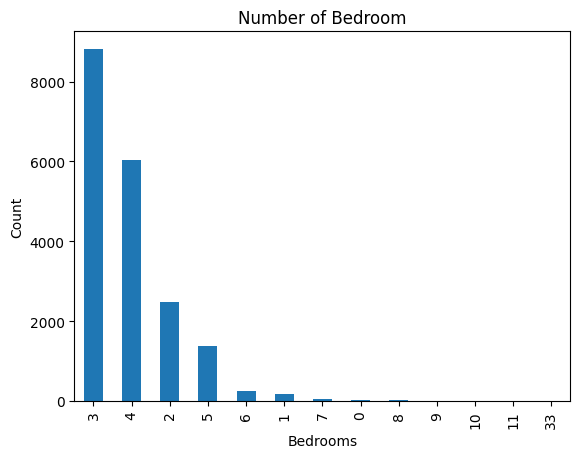

In [7]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

**Visualizing the location of the houses based on latitude and longitude.**

<Figure size 2000x1000 with 0 Axes>

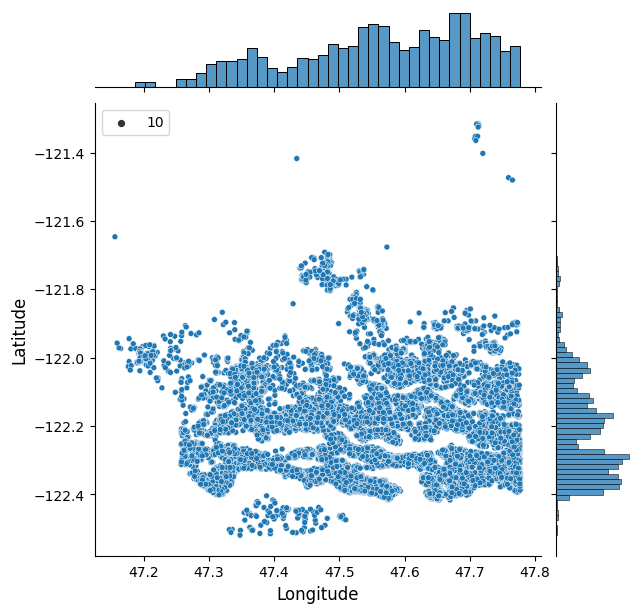

TypeError: ignored

In [8]:
plt.figure(figsize=(20,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()
plt1=plt()
sns.despine


**How common factors are affecting the price of the houses **

Text(0.5, 1.0, 'Price vs Square Feet')

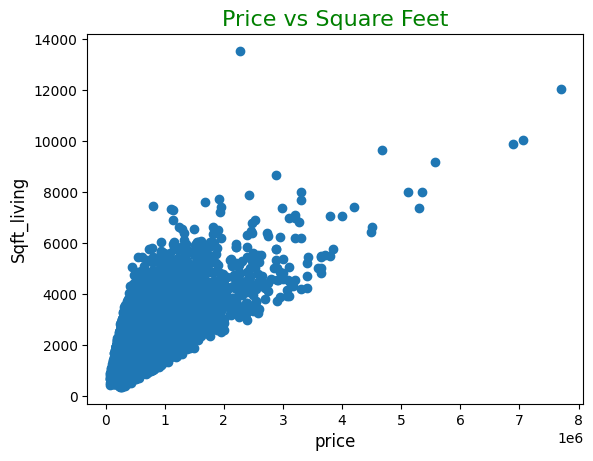

In [9]:
plt.scatter(data.price, data.sqft_living)
plt.xlabel("price", fontsize=12)
plt.ylabel("Sqft_living", fontsize=12)
plt.title("Price vs Square Feet", color='green', fontsize=16)

Text(0.5, 1.0, 'Price vs Location of the Area')

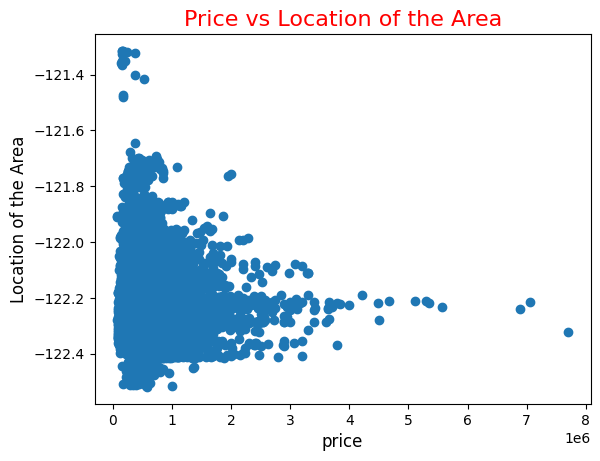

In [10]:
plt.scatter(data.price, data.long)
plt.xlabel("price", fontsize=12)
plt.ylabel("Location of the Area", fontsize=12)
plt.title("Price vs Location of the Area", color='red', fontsize=16)

Text(0.5, 1.0, 'Latitude vs Price')

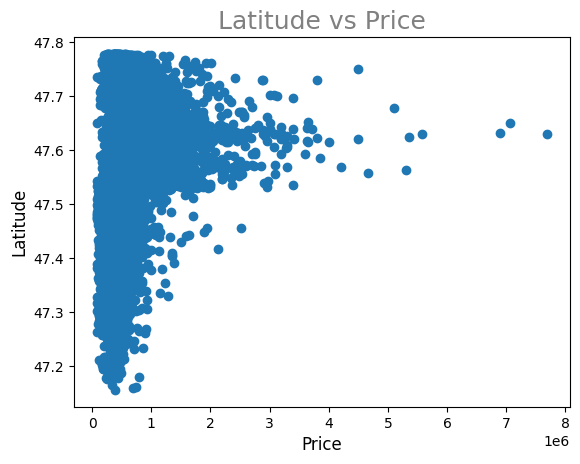

In [11]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Latitude vs Price", color='grey', fontsize=18)

**We can see more factors affecting the price**

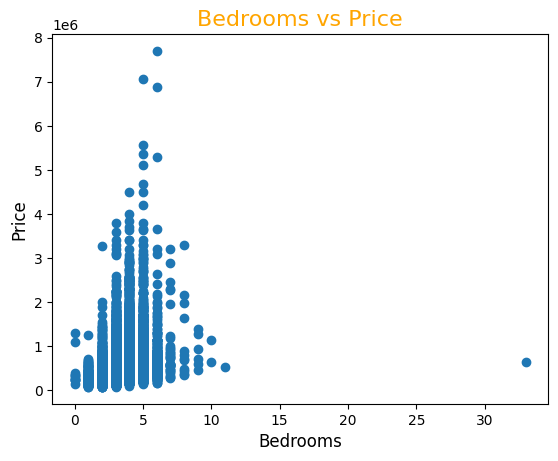

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
plt.scatter(data.bedrooms, data.price)
plt.xlabel("Bedrooms", size=12)
plt.ylabel("Price", size=12)
plt.title("Bedrooms vs Price", size=16, color='orange')
plt.show()
sns.despine

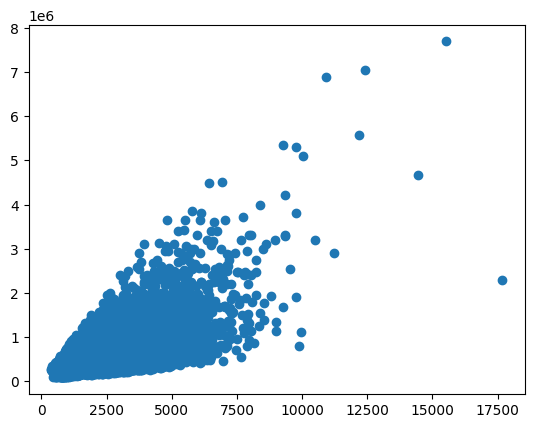

In [13]:
plt.scatter((data['sqft_living']+data['sqft_basement']), data['price'])

Text(0.5, 1.0, 'Waterfront vs Price(0= no waterfront)')

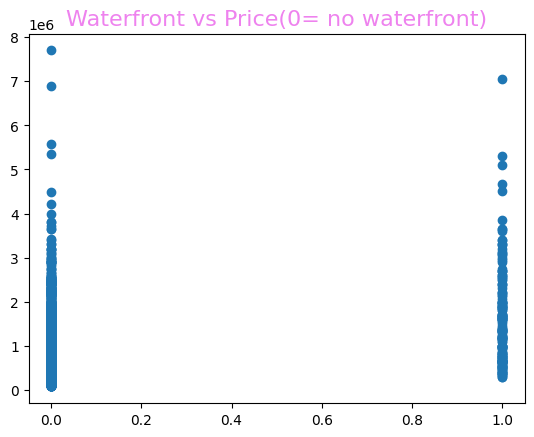

In [14]:
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price(0= no waterfront)", size=16, color='violet')

In [15]:
train1 = data.drop(['id', 'price'], axis=1)

In [16]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


<Axes: >

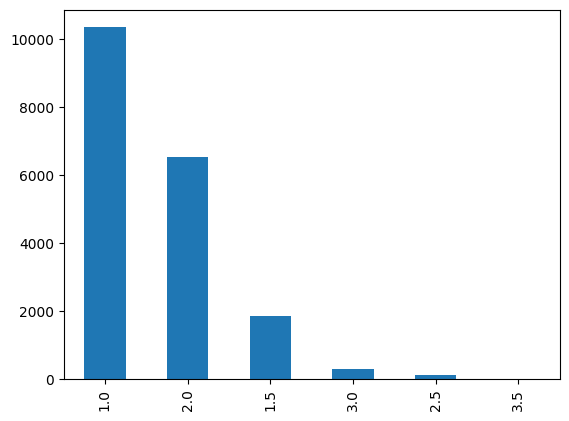

In [17]:
data.floors.value_counts().plot(kind='bar')

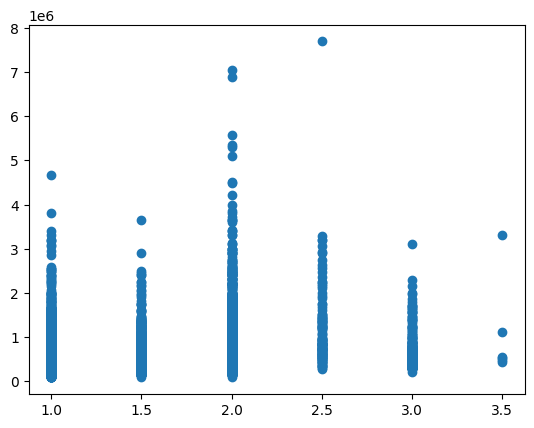

In [18]:
plt.scatter(data.floors, data.price)
plt.show()

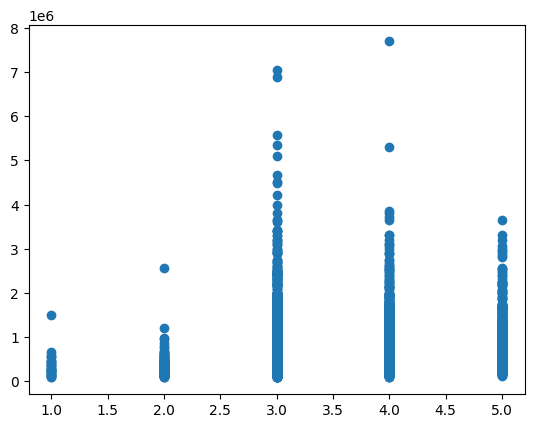

In [19]:
plt.scatter(data.condition, data.price)

Text(0.5, 1.0, 'Which is the Pricey location by zipcode?')

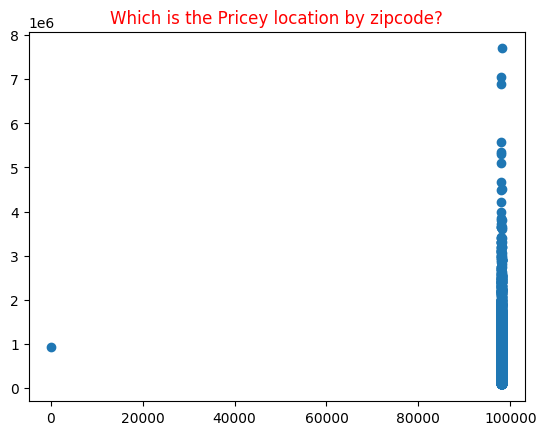

In [20]:
plt.scatter(data.zipcode, data.price)
plt.title("Which is the Pricey location by zipcode?", color='red')

**Linear Regression **

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg= LinearRegression()


In [23]:
labels = data['price']
conv_dates=[1 if values == 2014 else 0 for values in data.date]
data['date']= conv_dates
train1= data.drop(['id', 'price'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

In [47]:
reg.fit(x_train, y_train)

LinearRegression()

In [48]:
reg.score(x_test, y_test)

0.6806006210997829

In [49]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth = 5, min_samples_split=2, learning_rate=0.1, loss = 'squared_error')

In [50]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [51]:
clf.score(x_test,y_test)

0.8779733476467403

In [60]:
params= {
    'n_estimators': 400
    }
t_sc = np.zeros((params['n_estimators']), dtype=np.float64)


In [63]:
y_pred = reg.predict(x_test)

In [64]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
  t_sc[i]=clf.loss_(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


In [65]:
testsc = np.arange((params['n_estimators']))+1

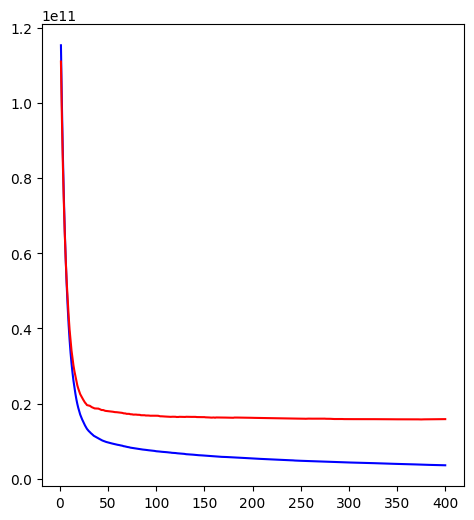

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

In [67]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [68]:
pca = PCA()

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train1_imputed = imputer.fit_transform(train1)
train1_scaled = scale(train1_imputed)

pca.fit_transform(train1_scaled)

array([[-2.31062893e+00, -5.63893849e-01, -1.25447810e-01, ...,
        -4.24679775e-02, -3.30194061e-17,  0.00000000e+00],
       [ 1.75676888e-01,  1.18821095e+00, -6.11605590e-01, ...,
         1.01068476e+00, -7.88091502e-15, -0.00000000e+00],
       [-2.65599201e+00, -2.18046599e-01,  1.08650517e-01, ...,
        -3.41788504e-02,  3.13445253e-14,  0.00000000e+00],
       ...,
       [-4.55538010e-01, -6.44894004e-01, -3.00925776e-01, ...,
         9.19909586e-01, -1.06775921e-17, -0.00000000e+00],
       [ 4.42614388e+00, -8.88186007e-01, -9.44711883e-01, ...,
         2.35807555e-01,  1.61992952e-16,  0.00000000e+00],
       [ 3.16524318e+00, -1.24332772e+00,  1.17291310e+00, ...,
         5.31069044e-01, -1.17320588e-17,  0.00000000e+00]])